In [2]:
import pandas as pd
import sys
import os
import warnings
warnings.filterwarnings('ignore')
sys.path.append('../scripts')
from data_loader import *
from credit_score import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# path to the CSV file
filename1 = 'featured_df.parquet'

path1 = os.path.join('..', 'data/featured', filename1)

# Load dataset
credit_df = load_data(path1)

In [4]:
credit_df

,Recency_binned_WoE,Frequency_binned_WoE,MeanAmount_binned_WoE,StdAmount_binned_WoE,AvgTransactionHour_binned_WoE,TotalDebits_binned_WoE,DebitCount_binned_WoE,CreditCount_binned_WoE,TransactionVolatility_binned_WoE,MonetaryAmount_binned_WoE,NetCashFlow_binned_WoE,DebitCreditRatio_binned_WoE,is_high_risk
2119,-0.078720,-0.007228,0.618891,1.427055,0.055907,0.881028,0.084341,0.066257,1.427055,1.020706,0.827036,0.340529,1
724,-0.078720,-0.007228,-1.170240,-0.777116,0.055907,-1.329867,0.084341,0.066257,-0.777116,-1.321256,-1.236489,1.396472,1
3600,0.925013,-0.424859,0.215335,0.653989,0.133019,0.834538,-0.407037,-0.324364,0.653989,0.665003,0.537004,0.643042,1
1751,0.925013,0.150993,-0.226865,-0.473464,-0.059147,0.321829,0.102146,0.208500,-0.473464,0.303278,0.303278,0.643042,1
1045,-0.078720,0.403433,0.215335,-0.473464,-0.115775,0.881028,0.269409,0.066257,-0.473464,1.020706,0.827036,1.396472,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,0.925013,-0.424859,-1.170240,-0.233333,-0.115775,0.881028,-0.407037,-0.324364,-0.233333,0.665003,-1.236489,-0.861444,0
3349,0.925013,0.150993,0.851523,0.653989,-0.059147,0.321829,0.102146,0.208500,0.653989,0.303278,0.303278,-0.931115,1
191,0.925013,-0.126873,-1.170240,-0.777116,-0.004593,-1.329867,-0.099801,-0.245755,-0.777116,-1.321256,-1.236489,1.396472,1
1986,-0.078720,0.403433,0.851523,1.427055,-0.115775,0.834538,0.269409,0.066257,1.427055,0.665003,0.537004,-0.931115,1


## Data

# Model 1:

### Model that assigns risk probability for a new customer

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

In [6]:
X = credit_df.drop('is_high_risk', axis=1)
y = credit_df['is_high_risk']

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the GradientBoostingClassifier model

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### Model Evalution

In [9]:
y_pred = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

Accuracy: 0.97
Precision: 0.97
Recall: 0.98
F1-score: 0.97
ROC-AUC: 0.96


### Plot the ROC-AUC curve

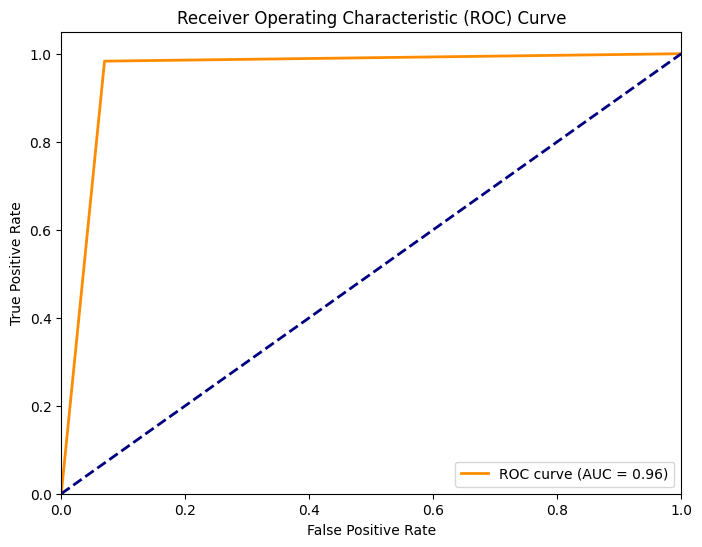

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Obtain risk probability for all users

In [11]:
df = credit_df.drop('is_high_risk', axis=1)

In [12]:
credit_df['risk_probability'] = gb_model.predict_proba(df)[:, 1]

In [13]:
credit_df['risk_probability']

2119    0.994262
724     0.969647
3600    0.988309
1751    0.989006
1045    0.977743
          ...   
2091    0.377790
3349    0.981579
191     0.999233
1986    0.998417
137     0.994033
Name: risk_probability, Length: 2640, dtype: float64

In [14]:
credit_df

,Recency_binned_WoE,Frequency_binned_WoE,MeanAmount_binned_WoE,StdAmount_binned_WoE,AvgTransactionHour_binned_WoE,TotalDebits_binned_WoE,DebitCount_binned_WoE,CreditCount_binned_WoE,TransactionVolatility_binned_WoE,MonetaryAmount_binned_WoE,NetCashFlow_binned_WoE,DebitCreditRatio_binned_WoE,is_high_risk,risk_probability
2119,-0.078720,-0.007228,0.618891,1.427055,0.055907,0.881028,0.084341,0.066257,1.427055,1.020706,0.827036,0.340529,1,0.994262
724,-0.078720,-0.007228,-1.170240,-0.777116,0.055907,-1.329867,0.084341,0.066257,-0.777116,-1.321256,-1.236489,1.396472,1,0.969647
3600,0.925013,-0.424859,0.215335,0.653989,0.133019,0.834538,-0.407037,-0.324364,0.653989,0.665003,0.537004,0.643042,1,0.988309
1751,0.925013,0.150993,-0.226865,-0.473464,-0.059147,0.321829,0.102146,0.208500,-0.473464,0.303278,0.303278,0.643042,1,0.989006
1045,-0.078720,0.403433,0.215335,-0.473464,-0.115775,0.881028,0.269409,0.066257,-0.473464,1.020706,0.827036,1.396472,1,0.977743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,0.925013,-0.424859,-1.170240,-0.233333,-0.115775,0.881028,-0.407037,-0.324364,-0.233333,0.665003,-1.236489,-0.861444,0,0.377790
3349,0.925013,0.150993,0.851523,0.653989,-0.059147,0.321829,0.102146,0.208500,0.653989,0.303278,0.303278,-0.931115,1,0.981579
191,0.925013,-0.126873,-1.170240,-0.777116,-0.004593,-1.329867,-0.099801,-0.245755,-0.777116,-1.321256,-1.236489,1.396472,1,0.999233
1986,-0.078720,0.403433,0.851523,1.427055,-0.115775,0.834538,0.269409,0.066257,1.427055,0.665003,0.537004,-0.931115,1,0.998417


## Save Dataset

In [15]:
output_folder = os.path.join('..', 'data', 'model_input')
filename = 'risk_prob_df.parquet'

output_path = save_data(credit_df, output_folder, filename)

Dataset saved to ..\data\model_input\risk_prob_df.parquet


## Save the Model

In [16]:
import os
import joblib

model_dir = '../models'
model_path = os.path.join(model_dir, 'credit_risk_prob_model.pkl')

os.makedirs(model_dir, exist_ok=True)

try:
    joblib.dump(gb_model, model_path)
    print(f"Model saved to {model_path}")
except Exception as e:
    print(f"An error occurred while saving the model: {e}")

Model saved to ../models\credit_risk_prob_model.pkl


# Model 2

## Model that assigns credit score from risk probability estimates

### First Assign a Credit Score for all Users based on FICO credit score range & risk probability estimates
FICO credit score is a widely recognized and standardized credit scoring model used by lenders and financial institutions.

In [17]:
credit_score_df = assign_credit_score(credit_df)
credit_score_df.head(15)

,Recency_binned_WoE,Frequency_binned_WoE,MeanAmount_binned_WoE,StdAmount_binned_WoE,AvgTransactionHour_binned_WoE,TotalDebits_binned_WoE,DebitCount_binned_WoE,CreditCount_binned_WoE,TransactionVolatility_binned_WoE,MonetaryAmount_binned_WoE,NetCashFlow_binned_WoE,DebitCreditRatio_binned_WoE,is_high_risk,risk_probability,credit_score,Rating
2119,-0.078720,-0.007228,0.618891,1.427055,0.055907,0.881028,0.084341,0.066257,1.427055,1.020706,0.827036,0.340529,1,0.994262,303,Poor
724,-0.078720,-0.007228,-1.170240,-0.777116,0.055907,-1.329867,0.084341,0.066257,-0.777116,-1.321256,-1.236489,1.396472,1,0.969647,317,Poor
3600,0.925013,-0.424859,0.215335,0.653989,0.133019,0.834538,-0.407037,-0.324364,0.653989,0.665003,0.537004,0.643042,1,0.988309,306,Poor
1751,0.925013,0.150993,-0.226865,-0.473464,-0.059147,0.321829,0.102146,0.208500,-0.473464,0.303278,0.303278,0.643042,1,0.989006,306,Poor
1045,-0.078720,0.403433,0.215335,-0.473464,-0.115775,0.881028,0.269409,0.066257,-0.473464,1.020706,0.827036,1.396472,1,0.977743,312,Poor
1753,0.969088,0.150993,-0.226865,-0.473464,0.133019,0.321829,0.102146,0.208500,-0.473464,0.303278,0.303278,-0.931115,0,0.010794,844,Exceptional
2547,0.925013,-0.126873,0.618891,1.427055,0.133019,-0.335709,-0.099801,-0.245755,1.427055,-0.297049,-0.163708,-0.931115,1,0.969400,317,Poor
156,-0.078720,-0.007228,0.618891,1.427055,0.055907,0.881028,0.084341,0.066257,1.427055,1.020706,0.827036,0.340529,1,0.994262,303,Poor
835,0.969088,-0.126873,-0.226865,-0.473464,0.133019,0.834538,-0.099801,-0.245755,-0.473464,0.665003,0.537004,0.643042,1,0.980921,310,Poor
3295,-0.078720,-0.007228,0.215335,-0.233333,-0.115775,-1.329867,0.084341,0.066257,-0.233333,-1.321256,0.827036,-0.931115,0,0.073222,810,Exceptional


In [18]:
len(credit_score_df['Rating'].unique())

5

##  Linear Regression Model
Model that assigns credit score from risk probability estimates

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

In [20]:
# Split the data 
X = credit_score_df.drop(['credit_score','Rating'], axis=1)
y = credit_score_df['credit_score']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

In [21]:
credit_score_model = LinearRegression()
credit_score_model.fit(X_train2, y_train2)

LinearRegression()

### Predict credit scores on the test set

In [22]:
y_pred2 = credit_score_model.predict(X_test2)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error, r2_score
mae = mean_absolute_error(y_test2, y_pred2)
mse = mean_squared_error(y_test2, y_pred2)

r2 = r2_score(y_test2, y_pred2)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 0.26
Mean Squared Error: 0.09
R-squared: 1.00


In [28]:
print('Sample Predictions:')
for i in range(5):
    print(f'Actual credit score: {y_test2.iloc[i]:.0f}, Predicted credit score: {y_pred2[i]:.0f}')

Sample Predictions:
Actual credit score: 302, Predicted credit score: 302
Actual credit score: 311, Predicted credit score: 311
Actual credit score: 347, Predicted credit score: 347
Actual credit score: 832, Predicted credit score: 832
Actual credit score: 347, Predicted credit score: 347


In [29]:
y = pd.Series(y_pred2)
y

0      301.945282
1      311.311264
2      347.260537
3      832.369532
4      347.244001
          ...    
523    311.440407
524    322.959254
525    783.208118
526    301.283621
527    300.714081
Length: 528, dtype: float64

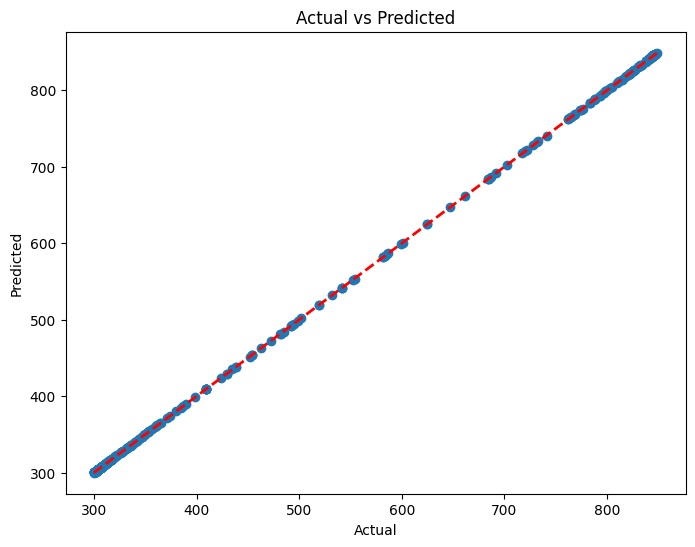

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test2, y_pred2)
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [31]:
import os
import joblib

model_dir = '../models'
model_path = os.path.join(model_dir, 'credit_score_model.pkl')

os.makedirs(model_dir, exist_ok=True)

try:
    joblib.dump(credit_score_model, model_path)
    print(f"Model saved to {model_path}")
except Exception as e:
    print(f"An error occurred while saving the model: {e}")

Model saved to ../models\credit_score_model.pkl
